In [10]:
'''To Do List
change to .json to get the Luminosity distance --DONE,
use polynomial fit --DONE,
show some graphs of fitting --DONE,
show differnce in fitting graph,
type IIP supernova,
Philips relation'''

'To Do List\nchange to .json to get the Luminosity distance --DONE,\nuse polynomial fit --DONE,\nshow some graphs of fitting --DONE,\nshow differnce in fitting graph,\ntype IIP supernova,\nPhilips relation'

In [11]:
import os
import glob
import numpy as np
import pandas as pd
import json
import math
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit, minimize
from lmfit import Model

In [12]:
# Import the .json file

os.chdir(r"C:\Users\ricky\JupyterNotebooks\Intern21\import_photometry_data\typeIa_photometry")
filename = glob.glob('*.json')
print(len(filename))

# Create a list for all .json, the 1st SN saved as json_data[0], the 2nd SN saved as json_data[1], etc.
json_data = []
for i in filename:
    with open(i, encoding="utf-8") as f:
        json_data.append(json.load(f))

60


In [13]:
# To obtain absolute magnitude and time in a particular band

Band = [] # Contain EM band chosen for analysis
Magnitude_Abs = [] # Contain absolute magnitude
Time = [] # Contain time (day)

for i in range(len(filename)): # Loop through all SN
    Band.append([]) # Create 2D list
    Magnitude_Abs.append([])
    Time.append([])
    
    SN_name = filename[i].replace('.json', '')
    N = len(json_data[i][SN_name]['photometry']) # The no. of data point of photometry in each SN
    
    for j in range(N): # Loop through all photemetry datapoint in one SN
        # Avoid any data point without band data
        try:
            Band[i].append(json_data[i][SN_name]['photometry'][j]['band'])
        except:
            Band[i].append(0)
        
        # Fill the Magnitude_Abs and Time list if the data point is in B band
        if Band[i][j] == 'B':
            Magnitude_App = float(json_data[i][SN_name]['photometry'][j]['magnitude']) # Obtain the apparent magnitude from photometry
            LumDist = float(json_data[i][SN_name]['lumdist'][0]['value']) # Obtain the luminosity distance
            z = float(json_data[i][SN_name]['redshift'][0]['value']) #Obtain the redshift, z
            Magnitude_Abs[i].append(Magnitude_App - 5*np.log10(LumDist*1e5) + 2.5*np.log10(1+z)) # Calculate the absolute magnitude and fill the Magnitude_Abs list
            Time[i].append(float(json_data[i][SN_name]['photometry'][j]['time'])) # Fill the Time list

id: 0 , SN: SN1937C.json , R^2 score: 0.988732878865562 , Time of maximum brightness: 28768.40584544134


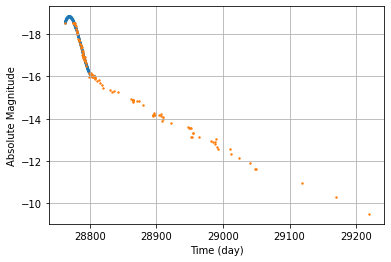

id: 1 , SN: SN1972E.json , R^2 score: 0.9905175876545577 , Time of maximum brightness: 41445.61063560536


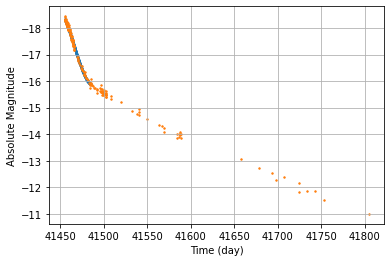

id: 2 , SN: SN1980N.json , R^2 score: 0.9846857756240645 , Time of maximum brightness: 44586.9442810094


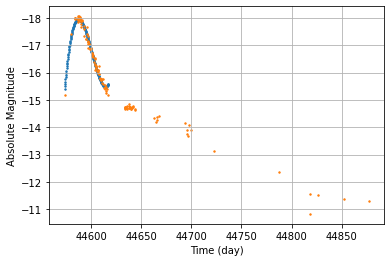

id: 3 , SN: SN1981B.json , R^2 score: 0.9846144087759883 , Time of maximum brightness: 44673.02845966103


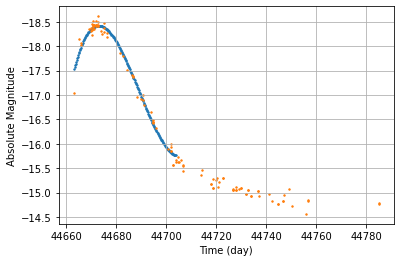

id: 4 , SN: SN1989B.json , R^2 score: 0.9554005148143478 , Time of maximum brightness: 47558.93984436832


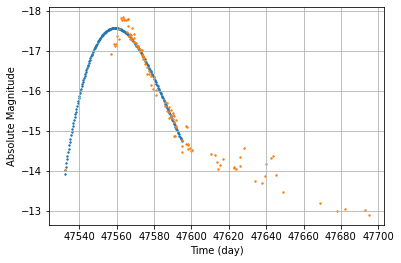

id: 5 , SN: SN1990N.json , R^2 score: 0.9931646012138895 , Time of maximum brightness: 48082.48291635189


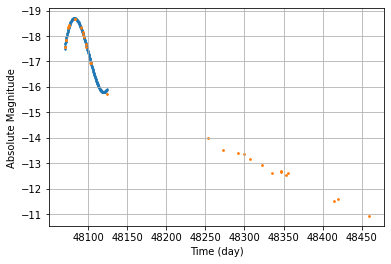

id: 6 , SN: SN1994ae.json , R^2 score: 0.9704489658442909 , Time of maximum brightness: 49686.10006635542


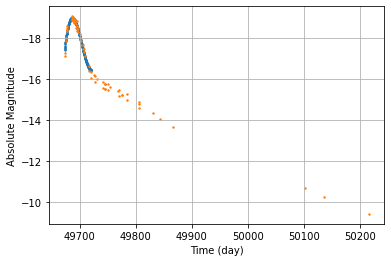

id: 7 , SN: SN1994D.json , R^2 score: 0.9898584484485022 , Time of maximum brightness: 49432.68780596096


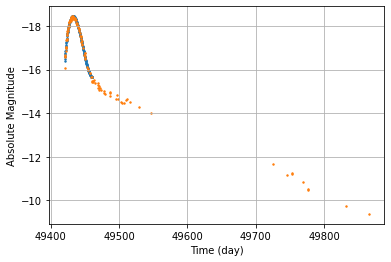

id: 8 , SN: SN1998bu.json , R^2 score: 0.9821311552978801 , Time of maximum brightness: 50952.52405168306


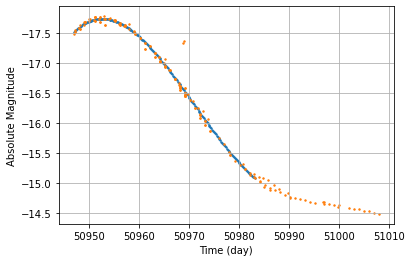

id: 9 , SN: SN1999ee.json , R^2 score: 0.998076632626825 , Time of maximum brightness: 51469.30354367003


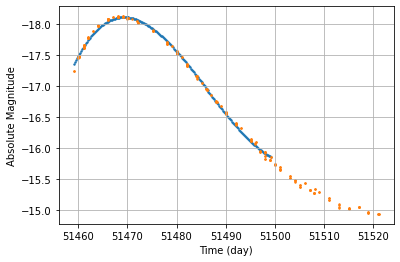

id: 10 , SN: SN2000cx.json , R^2 score: 0.9900274015428782 , Time of maximum brightness: 51753.358307950555


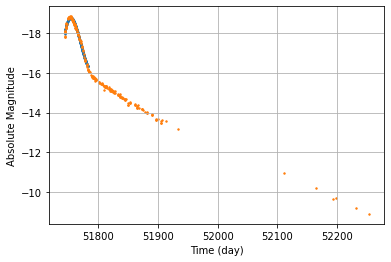

id: 11 , SN: SN2000E.json , R^2 score: 0.9678225142138278 , Time of maximum brightness: 51577.880882368976


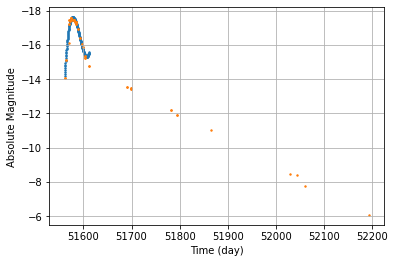

id: 12 , SN: SN2001el.json , R^2 score: 0.9984251096791606 , Time of maximum brightness: 52182.45440501414


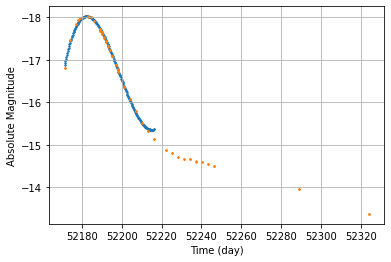

id: 13 , SN: SN2002er.json , R^2 score: 0.9839079442192133 , Time of maximum brightness: 52524.51786876884


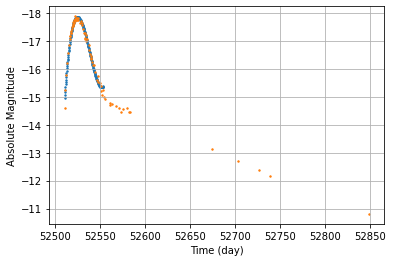

id: 14 , SN: SN2002fk.json , R^2 score: 0.9953429157875192 , Time of maximum brightness: 52548.477219767665


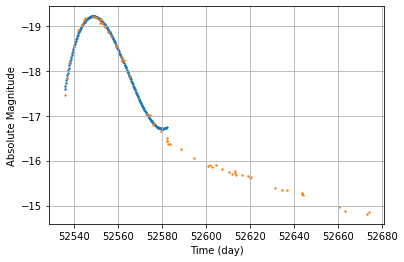

id: 15 , SN: SN2003cg.json , R^2 score: 0.9840455993804521 , Time of maximum brightness: 52729.48927515026


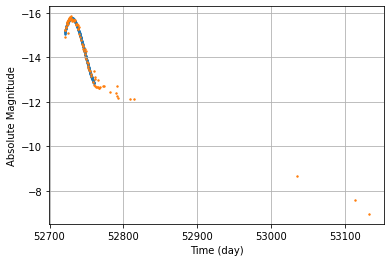

id: 16 , SN: SN2003du.json , R^2 score: 0.9882885175500344 , Time of maximum brightness: 52766.35687718935


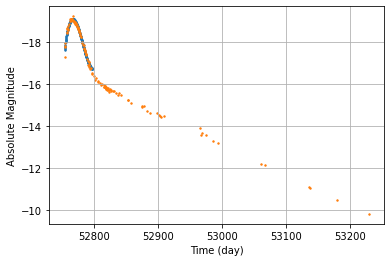

id: 17 , SN: SN2004eo.json , R^2 score: 0.9966440309528941 , Time of maximum brightness: 53278.390580997984


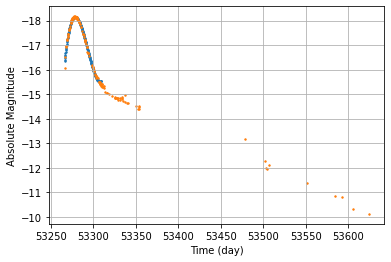

id: 18 , SN: SN2004gs.json , R^2 score: 0.9983814220599448 , Time of maximum brightness: 53355.05640998484


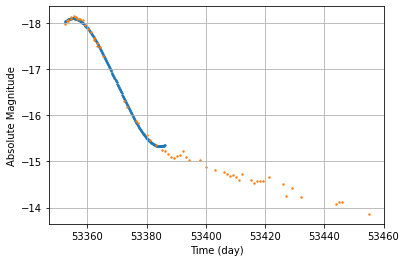

id: 19 , SN: SN2005ag.json , R^2 score: 0.9958444387403221 , Time of maximum brightness: 53412.625626899746


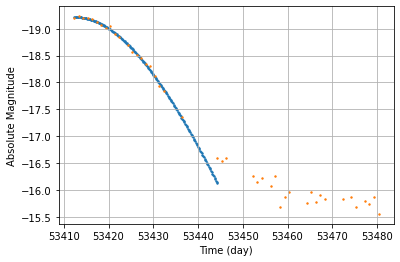

id: 20 , SN: SN2005am.json , R^2 score: 0.9965981098161915 , Time of maximum brightness: 53435.98343500728


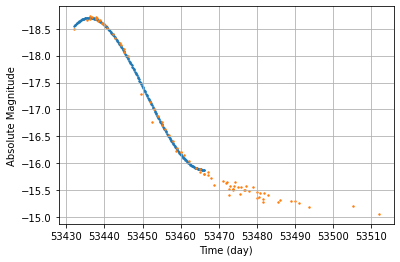

id: 21 , SN: SN2005cf.json , R^2 score: 0.9886305677037982 , Time of maximum brightness: 53534.05690606109


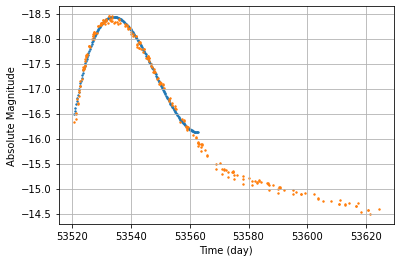

id: 22 , SN: SN2005el.json , R^2 score: 0.9973416165266329 , Time of maximum brightness: 53646.822391459085


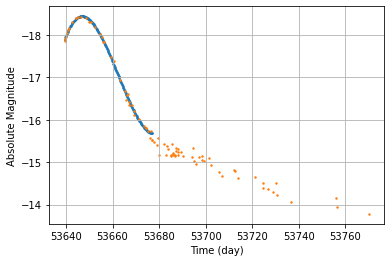

id: 23 , SN: SN2005hc.json , R^2 score: 0.994042055702299 , Time of maximum brightness: 53666.00886392432


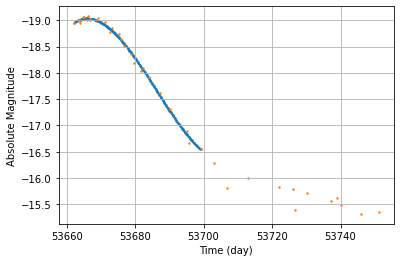

id: 24 , SN: SN2005ki.json , R^2 score: 0.9939521962931139 , Time of maximum brightness: 53705.63475725205


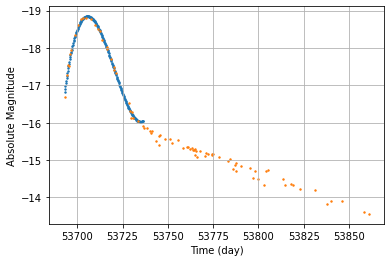

id: 25 , SN: SN2005na.json , R^2 score: 0.9934277558514427 , Time of maximum brightness: 53740.92243434375


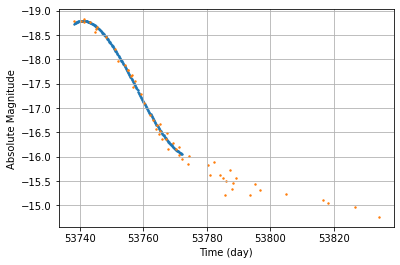

id: 26 , SN: SN2006ax.json , R^2 score: 0.9913088383056284 , Time of maximum brightness: 53827.40014693464


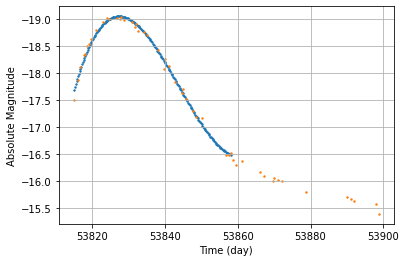

id: 27 , SN: SN2006D.json , R^2 score: 0.9977362116693932 , Time of maximum brightness: 53757.05990196819


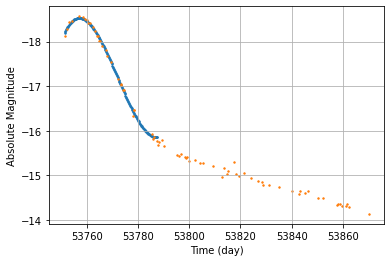

id: 28 , SN: SN2006le.json , R^2 score: 0.9835757094436987 , Time of maximum brightness: 54048.23397648502


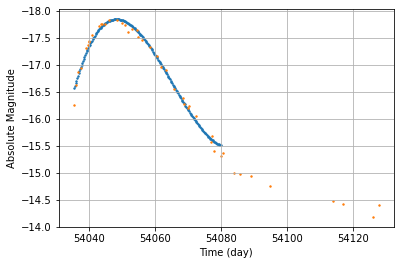

id: 29 , SN: SN2007af.json , R^2 score: 0.994738385393597 , Time of maximum brightness: 54174.4489971844


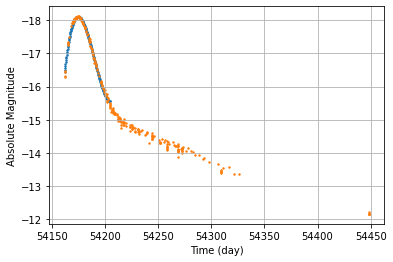

id: 30 , SN: SN2007if.json , R^2 score: 0.9938519174825255 , Time of maximum brightness: 54349.1339086388


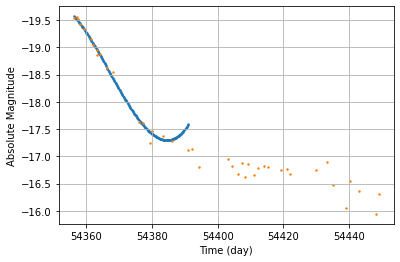

id: 31 , SN: SN2007jg.json , R^2 score: 0.9938390580694956 , Time of maximum brightness: 54365.79387317339


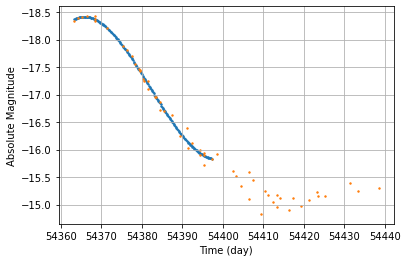

id: 32 , SN: SN2007on.json , R^2 score: 0.9899247407091807 , Time of maximum brightness: 54419.46845502415


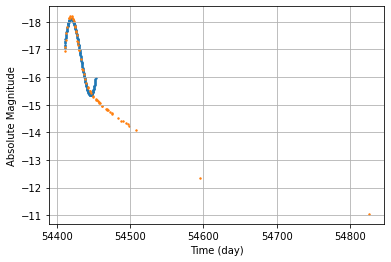

id: 33 , SN: SN2007sr.json , R^2 score: 0.9929333284861782 , Time of maximum brightness: 54445.698910533654


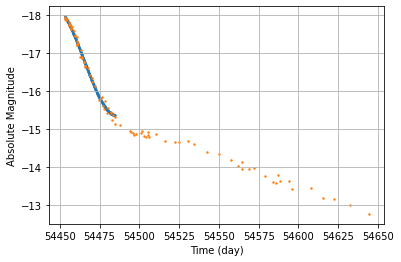

id: 34 , SN: SN2008C.json , R^2 score: 0.9943338630188031 , Time of maximum brightness: 54460.088212692164


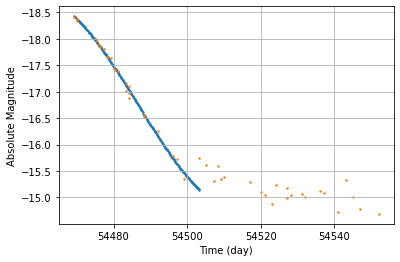

id: 35 , SN: SN2008hs.json , R^2 score: 0.9939913184058962 , Time of maximum brightness: 54812.35851839725


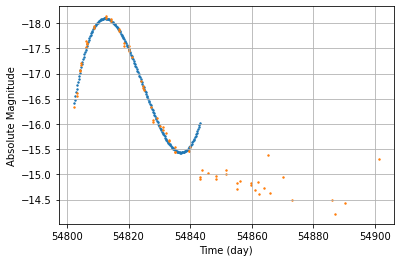

id: 36 , SN: SN2008hv.json , R^2 score: 0.9845066084127675 , Time of maximum brightness: 54817.49480591471


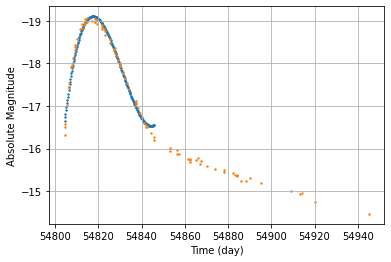

id: 37 , SN: SN2009an.json , R^2 score: 0.9835932495948518 , Time of maximum brightness: 54897.809223482305


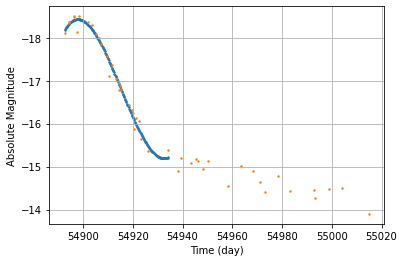

id: 38 , SN: SN2011by.json , R^2 score: 0.995771791394009 , Time of maximum brightness: 55691.30845739202


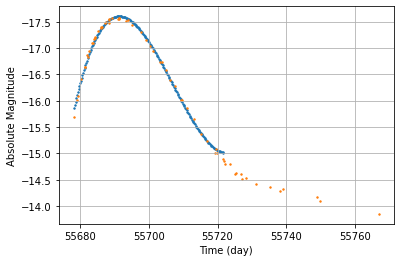

id: 39 , SN: SN2011fe.json , R^2 score: 0.9722936231899024 , Time of maximum brightness: 55815.37661202996


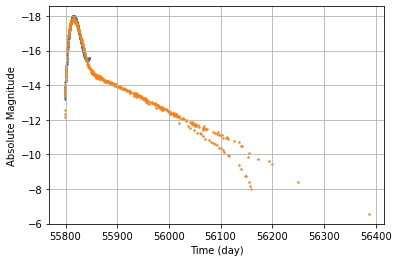

id: 40 , SN: SN2012cg.json , R^2 score: 0.9750920553974713 , Time of maximum brightness: 56082.629002827845


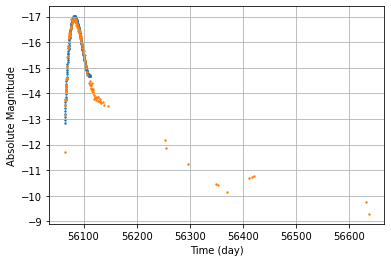

id: 41 , SN: SN2012fr.json , R^2 score: 0.9500184833380809 , Time of maximum brightness: 56244.358905304805


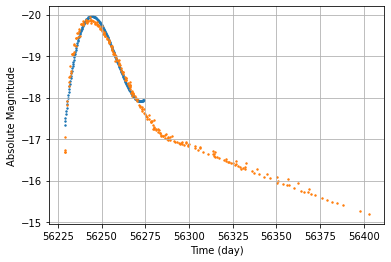

id: 42 , SN: SN2012hr.json , R^2 score: 0.9999999999999951 , Time of maximum brightness: 56287.78660557556


c:\users\ricky\anaconda3\envs\pytorch_gpu\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


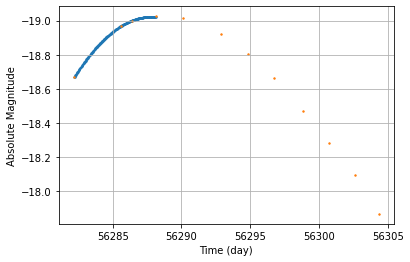

id: 43 , SN: SN2012ht.json , R^2 score: 0.9915545905402617 , Time of maximum brightness: 56296.215982396425


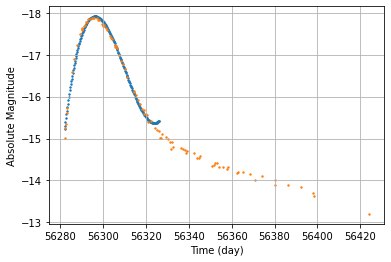

id: 44 , SN: SN2013aa.json , R^2 score: 0.9901064513349923 , Time of maximum brightness: 56347.42239743125


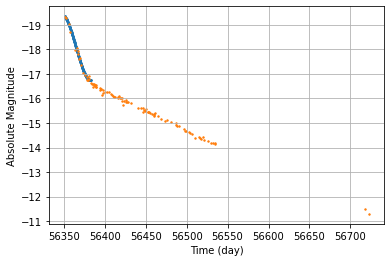

id: 45 , SN: SN2013gh.json , R^2 score: 0.9430481915655998 , Time of maximum brightness: 56528.54152960796


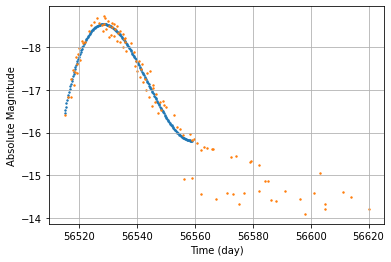

id: 46 , SN: SN2013gy.json , R^2 score: 0.9933501569980295 , Time of maximum brightness: 56648.62078278404


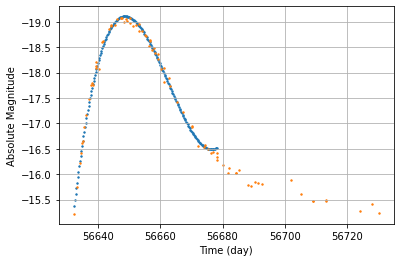

id: 47 , SN: SN2015F.json , R^2 score: 0.9780995731961495 , Time of maximum brightness: 57107.1739938816


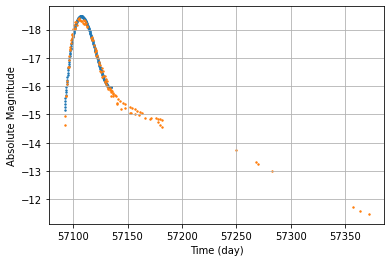

id: 48 , SN: SN2016coj.json , R^2 score: 0.9923082906512387 , Time of maximum brightness: 57548.27005376114


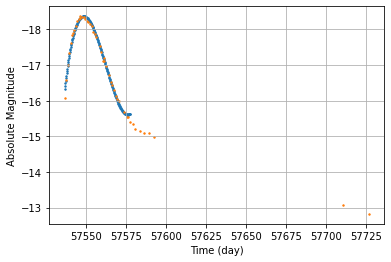

id: 49 , SN: SN2016dxj.json , R^2 score: 0.10412318062871861 , Time of maximum brightness: 57511.73550533834


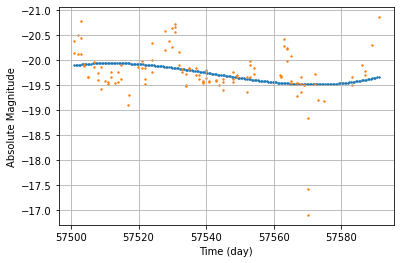

id: 50 , SN: SN2016dxv.json , R^2 score: 0.9972033596531069 , Time of maximum brightness: 57509.36774075451


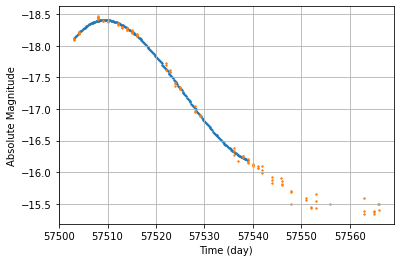

id: 51 , SN: SN2016fbo.json , R^2 score: 0.3796959177527546 , Time of maximum brightness: 57599.18062435453


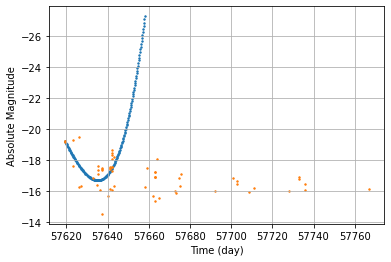

id: 52 , SN: SN2016hvl.json , R^2 score: 0.9917336001755375 , Time of maximum brightness: 57709.7942468835


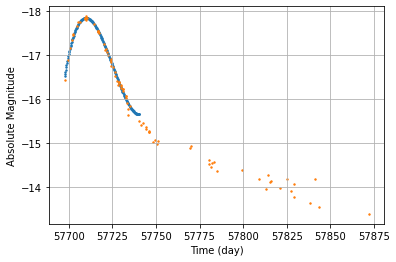

id: 53 , SN: SN2017drh.json , R^2 score: 0.9935056203290417 , Time of maximum brightness: 57890.47110287633


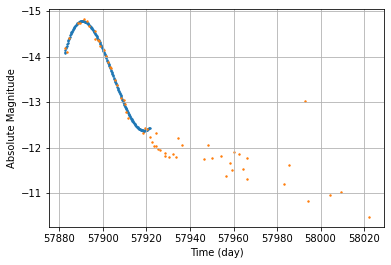

id: 54 , SN: SN2017erp.json , R^2 score: 0.9904634072893723 , Time of maximum brightness: 57935.27619751813


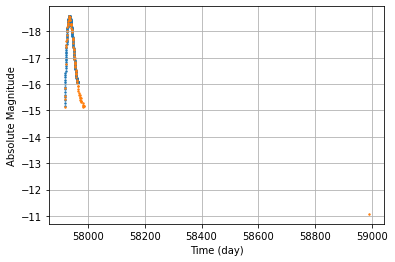

id: 55 , SN: SN2017fgc.json , R^2 score: 0.9719467982293416 , Time of maximum brightness: nan


<ipython-input-14-707b657dbd1a>:31: RuntimeWarning: invalid value encountered in double_scalars
  Time_max.append((-1*P[2] + ((P[2])**2 - 3*P[3]*P[1])**(1/2))/(3*P[3]))


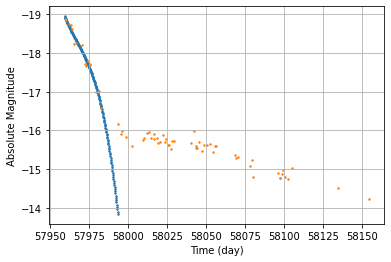

id: 56 , SN: SN2017hbi.json , R^2 score: 0.9941783377333921 , Time of maximum brightness: 58045.68124561917


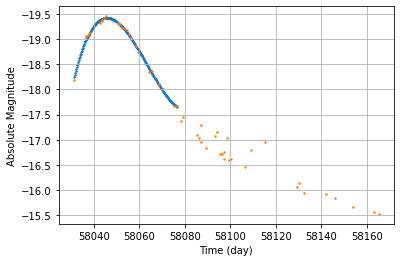

id: 58 , SN: SN2018gv.json , R^2 score: 0.9975787623935282 , Time of maximum brightness: 58150.00272917326


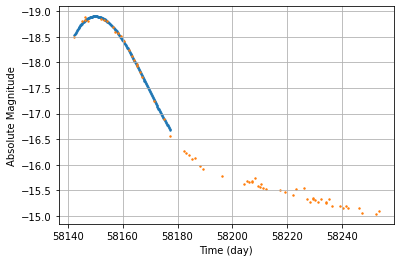

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 52, 53, 54, 56, 58]


In [14]:
# Peak fitting

from sklearn.metrics import r2_score
Succ_graph = [] # Save the number of successfully fitted graph
Time_max = [] # Save the day of maximum magnitude
fitting_days = 30 # Num of days after the maximum used for peak fitting from the peak

for i in range(len(filename)): # Loop through all SN
    if len(Time[i]) != 0: # Avoid empty list
        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude
        peak_time = Time[i][maximum] # Save the day of maximum magnitude
        tail_time = Time[i][maximum] # Save the day of the end of the initial lightcurve fall off
        
        # Calculate the day of the end of the initial lightcurve fall off
        j = 0
        if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
            while tail_time < (peak_time + fitting_days):
                tail_time = Time[i][maximum + j]
                if tail_time > (peak_time + fitting_days):
                    break
                j += 1
        
        # Save the peaking part of the light curve
        t = Time[i][:maximum + j]
        m = Magnitude_Abs[i][:maximum + j]
        
        # Polynomial (degree = 3) fit of the peak part of the light curve 
        P = np.poly1d(np.polyfit(t, m, deg = 3))
        
        # Save the time of maximum magnitude
        Time_max.append((-1*P[2] + ((P[2])**2 - 3*P[3]*P[1])**(1/2))/(3*P[3]))
        
        print('id:', i, ', SN:', filename[i], ', R^2 score:', r2_score(m, P(t)), ', Time of maximum brightness:', Time_max[i])
        
        # Print the graph of fitting
        X = np.linspace(Time[i][0], Time[i][maximum + j], 200)
        Y = P(X)
        plt.gca().invert_yaxis()
        plt.grid()
        plt.xlabel('Time (day)')
        plt.ylabel('Absolute Magnitude')
        #plt.xlim(Time[i][0] - 10, Time[i][maximum + j] + 50)
        plt.scatter(X, Y, s=2)
        plt.scatter(Time[i], Magnitude_Abs[i], s=2)
        plt.show()
        
        if (r2_score(m, P(t)) > 0.8) & (not math.isnan(Time_max[-1])):
            Succ_graph.append(i)
        
    else:
        Time_max.append(0)

print(Succ_graph)

In [15]:
'''lamb = 0.5
sigma = 0.14
offset = 0.5
def expconv(xrange):    
    piece1 = 1/(2*lamb)
    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) -(xrange-offset)/lamb)
    piece3 = math.erf(sigma/((np.sqrt(2)*lamb))-(xrange-offset)/(np.sqrt(2)*sigma))
    return np.log10(piece1*piece2*(1.0-piece3))

vec_expconv = np.vectorize(expconv)
xrange = np.arange(0.0,4, 0.01)
plt.plot(xrange, vec_expconv(xrange))
plt.show()         
'''

'lamb = 0.5\nsigma = 0.14\noffset = 0.5\ndef expconv(xrange):    \n    piece1 = 1/(2*lamb)\n    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) -(xrange-offset)/lamb)\n    piece3 = math.erf(sigma/((np.sqrt(2)*lamb))-(xrange-offset)/(np.sqrt(2)*sigma))\n    return np.log10(piece1*piece2*(1.0-piece3))\n\nvec_expconv = np.vectorize(expconv)\nxrange = np.arange(0.0,4, 0.01)\nplt.plot(xrange, vec_expconv(xrange))\nplt.show()         \n'

In [16]:
'''def expconv(xrange, lamb, sigma, offset, A):    
    piece1 = A/(2*lamb)
    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) - (xrange-offset)/lamb)
    piece3 = sp.special.erfc(sigma/((np.sqrt(2)*lamb)) - (xrange-offset)/(np.sqrt(2)*sigma))
    print('expconv result', piece1*piece2*piece3)
    return piece1*piece2*piece3

def cost(x, x_axis, datapoint_value):
    return np.sum((expconv(x_axis, x[0], x[1], x[2], x[3]) - datapoint_value)**2)

# Peak fitting

from sklearn.metrics import r2_score
Succ_graph = [] # Save the number of successfully fitted graph
Time_max = [] # Save the day of maximum magnitude
fitting_days = 15 # Num of days after the maximum used for peak fitting from the peak

for i in range(len(filename)): # Loop through all SN
    if len(Time[i]) != 0: # Avoid empty list
        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude
        peak_time = Time[i][maximum] # Save the day of maximum magnitude
        tail_time = Time[i][maximum] # Save the day of the end of the initial lightcurve fall off
        
        # Calculate the day of the end of the initial lightcurve fall off
        j = 0
        if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
            while tail_time < (peak_time + fitting_days):
                tail_time = Time[i][maximum + j]
                if tail_time > (peak_time + fitting_days):
                    break
                j += 1
        
        # Save the peaking part of the light curve
        t = Time[i][:maximum + j]
        m = Magnitude_Abs[i][:maximum + j]
        
        lamb_guess = 7
        sigma_guess = 5
        offset_guess = Time[i][maximum]
        A_guess = 1
        guesses = [lamb_guess, sigma_guess, offset_guess, A_guess]
        
        res = minimize(cost, guesses, args = (t, np.exp(m)), method = 'BFGS')
        print(res)
        #print(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))
        
        # Save the time of maximum magnitude
        Time_max.append(res.x[2])
        
        print('id:', i, ', SN:', filename[i], ', R^2 score:', r2_score(m, np.log10(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))), ', Time of maximum brightness:', Time_max[i])
        
        # Print the graph of fitting
        X = np.linspace(Time[i][0], Time[i][maximum + j], len(t))
        Y = np.log10(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))
        plt.gca().invert_yaxis()
        plt.grid()
        plt.xlabel('Time (day)')
        plt.ylabel('Absolute Magnitude')
        plt.xlim(Time[i][0] - 10, Time[i][maximum + j] + 50)
        plt.scatter(X, Y, s=2)
        plt.scatter(Time[i], Magnitude_Abs[i], s=2)
        plt.show()
    
        if r2_score(m, np.log10(expconv(t, res.x[0], res.x[1], res.x[2], res.x[3]))) > 0.8:
            Succ_graph.append(1)
        else:
            Succ_graph.append(0)
        
    else:
        Time_max.append(0)
        Succ_graph.append(0)


print(Succ_graph)'''

"def expconv(xrange, lamb, sigma, offset, A):    \n    piece1 = A/(2*lamb)\n    piece2 = np.exp(sigma*sigma/(2*lamb*lamb) - (xrange-offset)/lamb)\n    piece3 = sp.special.erfc(sigma/((np.sqrt(2)*lamb)) - (xrange-offset)/(np.sqrt(2)*sigma))\n    print('expconv result', piece1*piece2*piece3)\n    return piece1*piece2*piece3\n\ndef cost(x, x_axis, datapoint_value):\n    return np.sum((expconv(x_axis, x[0], x[1], x[2], x[3]) - datapoint_value)**2)\n\n# Peak fitting\n\nfrom sklearn.metrics import r2_score\nSucc_graph = [] # Save the number of successfully fitted graph\nTime_max = [] # Save the day of maximum magnitude\nfitting_days = 15 # Num of days after the maximum used for peak fitting from the peak\n\nfor i in range(len(filename)): # Loop through all SN\n    if len(Time[i]) != 0: # Avoid empty list\n        maximum = np.argmin(Magnitude_Abs[i]) # Obtain the id of the maximum magnitude\n        peak_time = Time[i][maximum] # Save the day of maximum magnitude\n        tail_time = Time[i]

In [17]:
Time_shifted = [] # Save the shifted time list for better result demonstration (All light curve peaking at day 0)

for i in range(len(filename)):
    Time_shifted.append([]) # Create 2D list
    diff = Time_max[i] - Time_max[0] 
    for j in range(len(Time[i])): # Calculate the shifted time list
        Time_shifted[i].append(Time[i][j] - diff - Time_max[0])

print(len(Time_shifted))

60


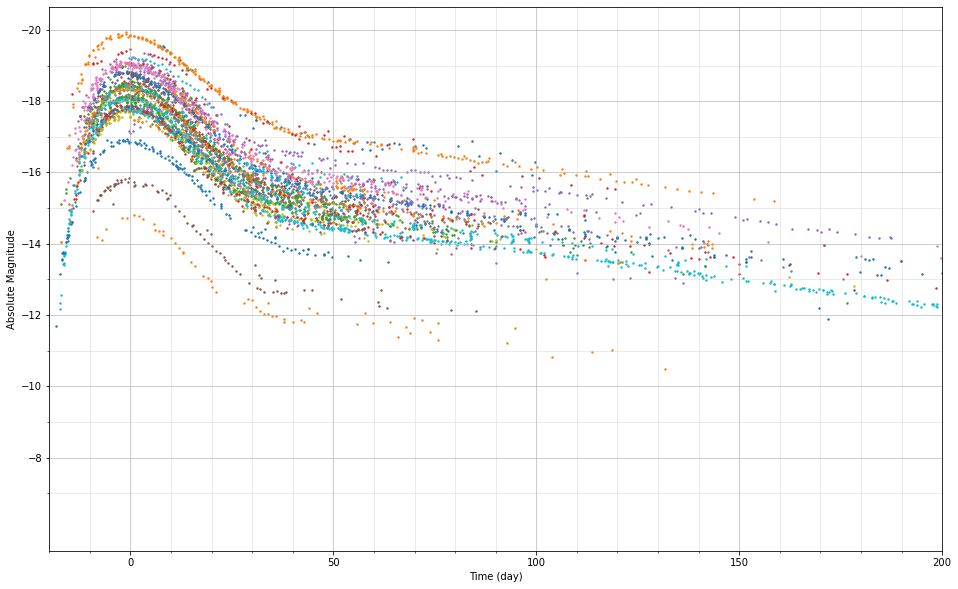

In [18]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(1, 1, 1)

plt.gca().invert_yaxis()

# Major ticks every 20, minor ticks every 5
major_ticks_x = np.arange(-50, 600, 50)
minor_ticks_x = np.arange(-50, 600, 10)

major_ticks_y = np.arange(-22, -6, 2)
minor_ticks_y = np.arange(-22, -6, 1)


ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)

ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

# And a corresponding grid
ax.grid(which='major', alpha=0.8)
ax.grid(which='minor', alpha=0.3)

plt.xlabel('Time (day)')
plt.ylabel('Absolute Magnitude')

plt.xlim(-20, 200)
#plt.ylim(-12, -21)

for i in range(len(Succ_graph)):
    plt.scatter(Time_shifted[Succ_graph[i]], Magnitude_Abs[Succ_graph[i]], s=2)

-18.843465328216553 1.0740489959716797
-18.707693099975586 0.85906982421875
-17.951229095458984 1.42803955078125
-18.42207145690918 1.2054672241210938
-17.572556495666504 0.7059383392333984
-18.70090675354004 1.0324993133544922
-18.968433380126953 1.0591487884521484
-18.451519012451172 1.52099609375
-17.731355667114258 1.02728271484375
-18.111568450927734 0.9710750579833984
-18.755950927734375 1.0745887756347656
-17.616565704345703 1.2270050048828125
-18.02813720703125 1.1823883056640625
-17.862823486328125 1.4726181030273438
-19.213634490966797 1.156524658203125
-15.758636474609375 1.1525306701660156
-19.110519409179688 1.1137123107910156
-18.148239135742188 1.3655014038085938
-18.09532928466797 1.4146270751953125
-19.215914726257324 0.8136529922485352
-18.7080078125 1.4237136840820312
-18.436397552490234 1.233367919921875
-18.43608856201172 1.3140525817871094
-19.033740997314453 0.8520145416259766
-18.85009002685547 1.458984375
-18.78844451904297 1.1585197448730469
-19.05646896362304

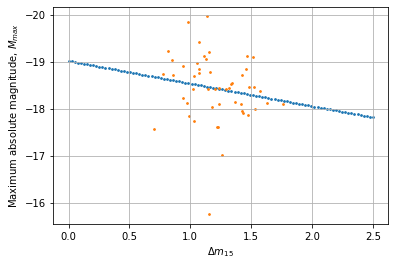

In [19]:
# Philips relation

M = []
dm_P = []

for i in range(len(Succ_graph)): # Loop through all SN
    maximum = np.argmin(Magnitude_Abs[Succ_graph[i]]) # Obtain the id of the maximum magnitude
    peak_time = Time[Succ_graph[i]][maximum] # Save the day of maximum magnitude
    tail_time = Time[Succ_graph[i]][maximum] # Save the day of the end of the initial lightcurve fall off
        
    # Calculate the day of the end of the initial lightcurve fall off
    j = 0
    if (peak_time + fitting_days) < Time[i][-1]: # Avoid light curve that is too short (fewer than 15 days after the peak)
        while tail_time < (peak_time + fitting_days):
            tail_time = Time[Succ_graph[i]][maximum + j]
            if tail_time > (peak_time + fitting_days):
                break
            j += 1
        
        # Save the peaking part of the light curve (include the rising, peak, and 15 days after the peak)
        t = Time[Succ_graph[i]][:maximum + j]
        m = Magnitude_Abs[Succ_graph[i]][:maximum + j]
        
        # Polynomial (degree = 3) fit of the peak part of the light curve 
        P = np.poly1d(np.polyfit(t, m, deg = 3))
        P_max = (-1*P[2] + ((P[2])**2 - 3*P[3]*P[1])**(1/2))/(3*P[3])
        
        M.append(P(P_max))
        dm_P.append(P(P_max + 15) - P(P_max))
        print(M[-1], dm_P[-1])


P1 = np.poly1d(np.polyfit(dm_P, M, deg = 1))
print(P1)
print(r2_score(M, P1(dm_P)))

# Plot out the linear relationship
plt.gca().invert_yaxis()
plt.xlabel('$\Delta m_{15}$')
plt.ylabel('Maximum absolute magnitude, $M_{max}$')
plt.grid()
x = np.linspace(0, 2.5, 100)
plt.scatter(x, P1(x), s=3)
plt.scatter(dm_P, M, s=3)